#### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
# !pip install pycaret
from pycaret.regression import *

#### Importing the data

In [2]:
data=pd.read_csv("data/FannieAcq2000-19FMac30-sample25_MlReady.csv")
data.head()

,Unnamed: 0,loanIdentifier,origChannel,origUPB,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,...,worstCreditScore,fmacRate,rateDiffPct,bankNumber,stateNumber,origYear,origMonth,origWeek,origDay,origDayOfWeek
0,0,212381983889,1,70000,67.0,67.0,2.0,16.0,281,0.0,...,620.0,7.12,0.018258,54,28,2001,3,9,1,3
1,1,590266713253,3,123000,86.0,86.0,2.0,43.0,532,25.0,...,762.0,7.02,-0.074074,44,51,2001,12,48,1,5
2,2,790109185814,3,401000,78.0,78.0,2.0,46.0,310,0.0,...,630.0,6.45,0.046512,4,10,2007,9,35,1,5
3,3,571967892461,3,215000,80.0,80.0,2.0,32.0,779,0.0,...,652.0,6.08,0.171875,45,45,2008,6,22,1,6
4,4,192898085850,3,215000,74.0,74.0,1.0,37.0,12,0.0,...,799.0,3.53,-0.043909,45,20,2013,2,5,1,4


In [3]:
data.rename(columns={'Unnamed: 0':'namedCol'}, inplace=True )

In [4]:
data.shape

(2616152, 21)

In [5]:
data = data.sample(frac=0.10)

In [8]:
#Checking for missing values
data.isnull().sum()

namedCol            0
loanIdentifier      0
origChannel         0
origUPB             0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
zipCode             0
pMIperct            0
mortInsType         0
worstCreditScore    0
fmacRate            0
rateDiffPct         0
bankNumber          0
stateNumber         0
origYear            0
origMonth           0
origWeek            0
origDay             0
origDayOfWeek       0
dtype: int64

In [9]:
#Checking datatypes of individual feature
data.dtypes

namedCol              int64
loanIdentifier        int64
origChannel           int64
origUPB               int64
origLTV             float64
origCLTV            float64
numBorrowers        float64
origDebtIncRatio    float64
zipCode               int64
pMIperct            float64
mortInsType         float64
worstCreditScore    float64
fmacRate            float64
rateDiffPct         float64
bankNumber            int64
stateNumber           int64
origYear              int64
origMonth             int64
origWeek              int64
origDay               int64
origDayOfWeek         int64
dtype: object

In [10]:
#Dropping features  not required in model building and prediction
data.drop(['namedCol', 'loanIdentifier'],1,inplace=True)

In [11]:
data.head()

,origChannel,origUPB,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,worstCreditScore,fmacRate,rateDiffPct,bankNumber,stateNumber,origYear,origMonth,origWeek,origDay,origDayOfWeek
1147401,3,116000,68.0,68.0,2.0,46.0,301,0.0,0.0,730.0,5.85,-0.017094,4,10,2008,4,14,1,1
168426,3,200000,40.0,40.0,1.0,35.0,907,0.0,0.0,778.0,5.68,-0.031690,4,4,2008,2,5,1,4
651987,1,264000,80.0,80.0,1.0,39.0,958,0.0,0.0,788.0,4.46,-0.019058,45,4,2013,7,27,1,0
2544478,3,600000,48.0,48.0,2.0,46.0,902,0.0,0.0,761.0,4.36,0.118119,4,4,2010,9,35,1,2
616576,1,157000,79.0,79.0,1.0,22.0,945,0.0,0.0,677.0,5.90,0.038136,32,4,2003,2,5,1,5


In [12]:
# #Dividing features into numerical and categorical features
# categorical=[]
# numerical=[]
# for col in list(data):
#     if(len(data[col].unique())<=30):
#         categorical.append(col)
#     else:
#         numerical.append(col)

### Chi-Square test for Feature Importance of Categorical Features

As majority of the features in the data are categorical, also the target feature is categorical we can use Chi-Square test for to get the feature importance.

In [13]:
# def Chi_square(col_1,col_2):
#     X=data[col_1].astype('str')
#     Y=data[col_2].astype('str')
#     observed_values=pd.crosstab(Y,X)
#     chi2, p, dof, expected = ss.chi2_contingency(observed_values)
#     if(p>0.05):
#         print(col_1," is not required")
#     else:
#         print(col_1," is required")
        
# for col in data:
#     Chi_square(col,"origIntRate")

### Feature Selection using Backward Elimination for Numerical Features

Using Backward Elimination method for numerical features

In [14]:
# X=data.drop(['origIntRate'],1)
# y=le.fit_transform(data["origIntRate"])

# import statsmodels.api as sm
# cols = list(X.columns)
# pmax = 1
# while (pmax>0.05):
#     p=[]
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         breakselected_features_BE = cols
# print("Best features using Backward Elimination: ",cols)

### Feature Importance using Random Forest Classifier

Random Forest is considered to be one of the most unbiased model. As it creates multiple Decision Trees taking into account Random Features for each Decision Tree.

Because of this randomness the Random Forest Classifier considerd to be giving most unbiased Feature Importance

In [15]:
# X_rfc=data.drop(["origIntRate"],1)
# y_rfc=data["origIntRate"]

In [16]:
# rfc=RandomForestClassifier(criterion='entropy',random_state=0,n_estimators=10)
# rfc.fit(X_rfc,y_rfc)

In [17]:
# plt.figure(figsize=(10,10))
# plt.barh(list(X_rfc),rfc.feature_importances_)
# plt.title("Feature Importance using Random Forest Classifier")
# plt.ylabel("Features")
# plt.xlabel('Feature Importance Value')

In [18]:
data.head()

,origChannel,origUPB,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,worstCreditScore,fmacRate,rateDiffPct,bankNumber,stateNumber,origYear,origMonth,origWeek,origDay,origDayOfWeek
1147401,3,116000,68.0,68.0,2.0,46.0,301,0.0,0.0,730.0,5.85,-0.017094,4,10,2008,4,14,1,1
168426,3,200000,40.0,40.0,1.0,35.0,907,0.0,0.0,778.0,5.68,-0.031690,4,4,2008,2,5,1,4
651987,1,264000,80.0,80.0,1.0,39.0,958,0.0,0.0,788.0,4.46,-0.019058,45,4,2013,7,27,1,0
2544478,3,600000,48.0,48.0,2.0,46.0,902,0.0,0.0,761.0,4.36,0.118119,4,4,2010,9,35,1,2
616576,1,157000,79.0,79.0,1.0,22.0,945,0.0,0.0,677.0,5.90,0.038136,32,4,2003,2,5,1,5


In [19]:
#Dropping 'gameId' feature as it's not required in model building and prediction
# data.drop(['origIntRate'],1,inplace=True)

In [20]:
data.head()

,origChannel,origUPB,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,worstCreditScore,fmacRate,rateDiffPct,bankNumber,stateNumber,origYear,origMonth,origWeek,origDay,origDayOfWeek
1147401,3,116000,68.0,68.0,2.0,46.0,301,0.0,0.0,730.0,5.85,-0.017094,4,10,2008,4,14,1,1
168426,3,200000,40.0,40.0,1.0,35.0,907,0.0,0.0,778.0,5.68,-0.031690,4,4,2008,2,5,1,4
651987,1,264000,80.0,80.0,1.0,39.0,958,0.0,0.0,788.0,4.46,-0.019058,45,4,2013,7,27,1,0
2544478,3,600000,48.0,48.0,2.0,46.0,902,0.0,0.0,761.0,4.36,0.118119,4,4,2010,9,35,1,2
616576,1,157000,79.0,79.0,1.0,22.0,945,0.0,0.0,677.0,5.90,0.038136,32,4,2003,2,5,1,5


### Model building using Pycaret Library

In [21]:
models=setup(data, target = 'rateDiffPct', categorical_features = ['origChannel','numBorrowers','mortInsType','bankNumber',
                                                                   'zipCode', 'stateNumber','origYear','origMonth','origWeek',
                                                                   'origDay','origDayOfWeek'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1862
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(261615, 19)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [22]:
model_results=compare_models(blacklist = ['tr'], fold = 5)
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0397,0.0028,0.0528,0.4653,0.0426,-0.0178
1,CatBoost Regressor,0.0397,0.0028,0.0528,0.4648,0.0426,-0.0305
2,Random Forest,0.0407,0.003,0.0544,0.4325,0.0436,-0.0048
3,Extra Trees Regressor,0.0405,0.003,0.0545,0.4295,0.0434,-0.0382
4,Extreme Gradient Boosting,0.0417,0.0031,0.0554,0.4108,0.0449,-0.0189
5,Gradient Boosting Regressor,0.0418,0.0031,0.0555,0.4098,0.0449,-0.0282
6,Bayesian Ridge,0.0442,0.0035,0.0588,0.3376,0.0458,-0.0734
7,Orthogonal Matching Pursuit,0.0447,0.0035,0.0593,0.3264,0.046,-0.0809
8,Ridge Regression,0.045,0.0036,0.0597,0.3179,0.046,-0.0881
9,AdaBoost Regressor,0.0458,0.0037,0.0605,0.2995,0.0494,0.0075


In [23]:
logreg_model=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0399,0.0028,0.0525,0.4500,0.0435,-0.1229
1,0.0415,0.0030,0.0552,0.4453,0.0449,-0.1274
2,0.0392,0.0027,0.0520,0.4470,0.0413,-0.1375
3,0.0396,0.0028,0.0533,0.4467,0.0424,0.0754
4,0.0391,0.0027,0.0519,0.5090,0.0427,0.0168
5,0.0393,0.0027,0.0520,0.4869,0.0419,0.0842
6,0.0398,0.0028,0.0532,0.5052,0.0429,0.1064
7,0.0392,0.0027,0.0519,0.4642,0.0417,-0.1171
8,0.0393,0.0028,0.0525,0.4761,0.0422,-0.0592
9,0.0395,0.0028,0.0527,0.4315,0.0419,-0.0861


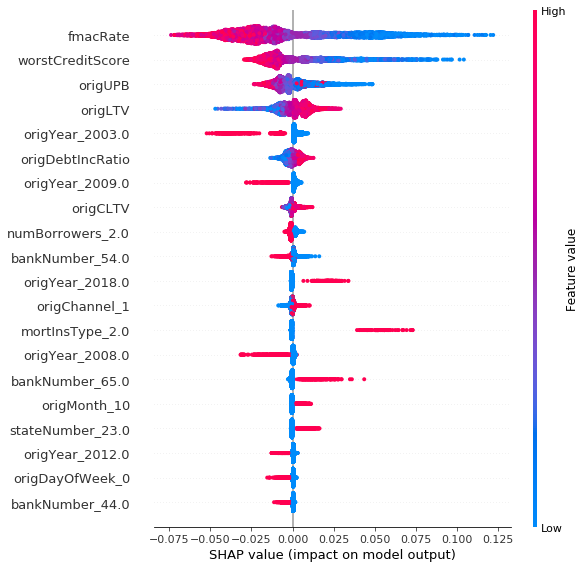

In [24]:
interpret_model(estimator=logreg_model,plot='summary')

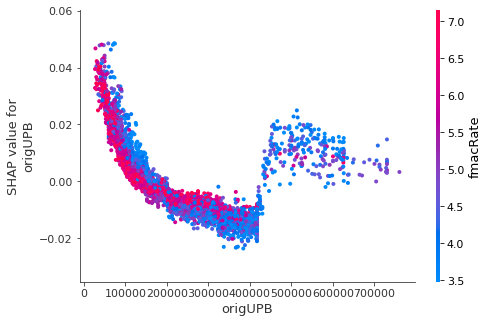

In [29]:
interpret_model(estimator=logreg_model, plot='correlation')

In [33]:
light_predict = predict_model(logreg_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0397,0.0029,0.0535,0.4642,0.0431,-0.0192


In [34]:
final = finalize_model(logreg_model)

In [35]:
final

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1862, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
tuned_lightgbm = tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0430,0.0032,0.0570,0.3518,0.0467,-0.0720
1,0.0450,0.0036,0.0600,0.3439,0.0491,-0.1011
2,0.0418,0.0031,0.0554,0.3721,0.0449,-0.0707
3,0.0428,0.0033,0.0572,0.3624,0.0456,0.0158
4,0.0432,0.0034,0.0579,0.3888,0.0476,-0.0045
5,0.0427,0.0032,0.0568,0.3887,0.0461,0.0375
6,0.0436,0.0034,0.0583,0.4047,0.0477,0.0369
7,0.0425,0.0032,0.0564,0.3676,0.0458,-0.0698
8,0.0427,0.0033,0.0572,0.3796,0.0465,0.0039
9,0.0423,0.0032,0.0564,0.3480,0.0453,-0.0531
